In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy 
import scipy.stats

In [4]:
data = pd.read_csv(r"https://raw.githubusercontent.com/bz374/ORIE5147Project/main/Possible%20Features.csv")

In [5]:
data.head()

,ID Code,Sample ID Code,Parent 1 Highest Grade,Race,Sex,Self Esteem Score,AFQT Percentile Score,Type of Residence 1983,Average Drinks 2008,Highest Grade,Income 2018,Par 1 Alive,Par 2 Alive,Par 1 Death Age,Par 2 Death Age,Type Residence 1979,Fam Size 1979
0,1,5,12,3,2,-5,-4,-5,-5,12,-5,-4,-4,-4,-4,-4,5
1,2,5,8,3,2,16,6841,-4,-4,12,25000,0,1,-4,-4,-4,5
2,3,5,10,3,2,20,49444,11,2,12,80000,1,1,-4,-4,-4,5
3,4,5,10,3,2,-5,55761,11,-5,14,0,-4,-4,-4,-4,-4,5
4,5,1,13,3,1,23,96772,3,-5,18,-5,-4,-4,-4,-4,1,4


In [6]:
# data cleanUp 1: change all negative values to -1 (~ N/A)
for col in data:
    # for each column
    data.loc[(data[col] < 0), col] = -1

# data cleanUp 2: drop all rows where Income 2018 is N/A (i.e. -1)
    data.drop(data[data["Income 2018"] < 0].index, inplace=True)
    
# data cleanUp 3: separate y (Income 2018) from features (rest of columns)
y = data.loc[:, "Income 2018"]
data = data.drop("Income 2018", axis=1)

In [11]:
data = data.sample(frac = 1) # we shuffle the data so that our train/test split will be truly random
y = y.sample(frac = 1)

train_proportion = 0.8
n = len(data)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)

target = y

# the following variable records the features of examples in the training set
train_x = data.iloc[:t]
# the following variable records the features of examples in the test set
test_x = data.iloc[t:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t:]


Size of dataset:  6571


w = [-76821.1571673    9051.22366675]


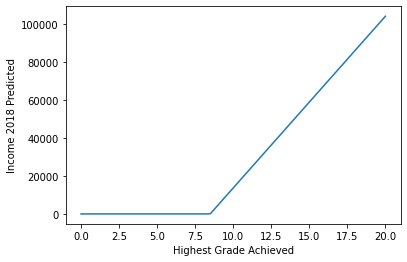

In [57]:
# fit an example linear model: use Highest Grade to predict Income 2018

# 1. fill in N/As in Highest Grade with Average Grade of all interviewees
x = np.asarray(data.loc[:, "Highest Grade"])
mean = np.mean(x)
x[x < 0] = mean

# 2. fit the linear model
x = np.reshape(x, (len(x), 1))
x = np.concatenate([np.ones(x.shape), x], axis=1) # add offset
w = np.linalg.solve(np.matmul(x.T, x), x.T@y)
print('w = ' + str(w))

# 3. plot the Grade - Income model
xfp = np.arange(np.min(x), np.max(x) + 0.1, 0.1)
vals = np.asarray([w[0] + w[1]*xfp[i] for i in range(len(xfp))])
vals[vals < 0] = 0 # attenuate negative predicted income to 0. Otherwise negative income does not make sense.
plt.plot(xfp, vals)
plt.ylabel("Income 2018 Predicted")
plt.xlabel("Highest Grade Achieved")
plt.show()